In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as AC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('crime.csv')

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
df_norm=norm_func(df.iloc[:,1:])

In [8]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


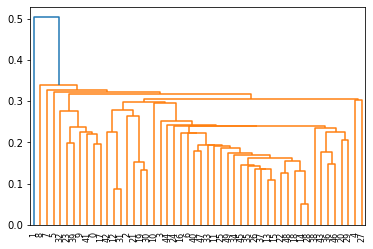

In [9]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

In [10]:
model=AC(n_clusters=4,affinity='euclidean',linkage='complete').fit(df_norm)

In [11]:
clusters_labels=pd.Series(model.labels_)

In [12]:
df['Clusters']=clusters_labels

In [13]:
df=df.iloc[:,[5,0,1,2,3,4]]

In [14]:
df.iloc[:,2:].groupby(df.Clusters).median()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,13.80,254.0,53.0,22.35
1,5.95,132.5,70.0,18.40
2,2.40,82.0,52.0,11.25
3,11.20,254.5,80.0,31.45


In [15]:
df

,Clusters,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,3,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,3,California,9.0,276,91,40.6
5,3,Colorado,7.9,204,78,38.7
6,1,Connecticut,3.3,110,77,11.1
7,1,Delaware,5.9,238,72,15.8
8,3,Florida,15.4,335,80,31.9
9,0,Georgia,17.4,211,60,25.8


In [16]:
#using DBSCAN

In [17]:
df1=pd.read_csv('crime.csv')

In [18]:
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [19]:
df_new=df1.drop(df1.columns[0],axis=1)

In [20]:
df_new

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [21]:
array=df_new.values

In [22]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [23]:
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)

In [24]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [25]:
from sklearn.cluster import DBSCAN
db_sc=DBSCAN(eps=0.9,min_samples=6)
db_sc.fit(x)

DBSCAN(eps=0.9, min_samples=6)

In [26]:
db_sc.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [27]:
cl=pd.DataFrame(db_sc.labels_,columns=['cluster'])

In [28]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [29]:
pd.concat([df1,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [30]:
#using K Means

In [31]:
df5=pd.read_csv('crime.csv')

In [32]:
df5.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [33]:
df_new=df1.drop(df1.columns[0],axis=1)

In [34]:
df_new

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [35]:
from sklearn import preprocessing
crime_rates_standardized = preprocessing.scale(df_new)
print(crime_rates_standardized)
crime_rates_standardized = pd.DataFrame(crime_rates_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

In [36]:
from sklearn.cluster import KMeans

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized)

y_kmeans

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [38]:

y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df_new['cluster'] = cluster

In [39]:
kmeans_mean_cluster = pd.DataFrame(round(df_new.groupby('cluster').mean(),1))
kmeans_mean_cluster
cluster = list(y_kmeans1)
df_new['cluster']=cluster

In [40]:
df_new

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,4
5,7.9,204,78,38.7,4
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,4
9,17.4,211,60,25.8,1


In [41]:
df_new[df_new['cluster']==1]

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
3,8.8,190,50,19.5,1
9,17.4,211,60,25.8,1
17,15.4,249,66,22.2,1
23,16.1,259,44,17.1,1
32,13.0,337,45,16.1,1
39,14.4,279,48,22.5,1
41,13.2,188,59,26.9,1


In [42]:
df_new[df_new['cluster']==2]

,Murder,Assault,UrbanPop,Rape,cluster
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
10,5.3,46,83,20.2,2
13,7.2,113,65,21.0,2
15,6.0,115,66,18.0,2
20,4.4,149,85,16.3,2
29,7.4,159,89,18.8,2
34,7.3,120,75,21.4,2
35,6.6,151,68,20.0,2
36,4.9,159,67,29.3,2


In [43]:
df_new[df_new['cluster']==3]

,Murder,Assault,UrbanPop,Rape,cluster
11,2.6,120,54,14.2,3
14,2.2,56,57,11.3,3
16,9.7,109,52,16.3,3
18,2.1,83,51,7.8,3
22,2.7,72,66,14.9,3
25,6.0,109,53,16.4,3
26,4.3,102,62,16.5,3
28,2.1,57,56,9.5,3
33,0.8,45,44,7.3,3
40,3.8,86,45,12.8,3
